In [57]:
from bertopic import BERTopic
from top2vec import Top2Vec
from sklearn.datasets import fetch_20newsgroups
from unicodedata import normalize
from tqdm import tqdm
from glob import glob
import spacy

In [44]:
with open(r'Tolstoi - La mort de Ivan Ilitch.txt', 'r', encoding='utf-8') as file:
    ivan_illitch = file.readlines()

In [45]:
str_base = " "
ivan_illitch_str = str_base.join(ivan_illitch)

In [46]:
def clean_text(txt):
    txt_res = normalize("NFKD", str(txt).replace(u'\xa0', u' '))
    txt_res = txt_res.replace(u'\\xa0', u' ')
    txt_res = txt_res.replace(u'\\n', u'')
    txt_res = txt_res.replace(u'\n', u'')
    txt_res = txt_res.replace(u'\\', u'')
    txt_res = txt_res.replace(u'\'', u'')

    return txt_res

In [47]:
ivan_illitch_cleaned = clean_text(ivan_illitch_str)

In [51]:
len(ivan_illitch_cleaned)

133515

In [58]:
nlp = spacy.load('fr_core_news_lg')

In [115]:
stopwords = nlp.Defaults.stop_words

In [166]:
docs = nlp(ivan_illitch_cleaned)

In [167]:
len(docs)

25887

In [177]:
def lemmatized_ivan(docs, sw):
    pos_ko = ["NUM", "X", "SYM", "PUNCT", "SPACE"]
    list_lemma = []
    list_token = []
    for token in docs:
        list_token.append(token.text)
        if token.text not in sw and token.pos_ not in pos_ko:
            list_lemma.append(token.lemma_)    
    return list_token, list_lemma

In [178]:
list_token, list_lemma = lemmatized_ivan(docs, stopwords)

In [179]:
def chunkise(list_token, n):
    str_base = " "
    list_chunks = []
    for i in range(0, len(list_token)-n, n):
        list_chunks.append(str_base.join(list_token[i:i+n]))
    return list_chunks

In [180]:
list_chunks_token = chunkise(list_token, 50)

In [181]:
list_chunks_lemma = chunkise(list_lemma, 50)

### BERT TOPIC

In [185]:
topic_model = BERTopic(language="french")

In [192]:
topics, probs = topic_model.fit_transform(list_chunks_lemma)

2022-05-20 11:08:17,399 - BERTopic - Transformed documents to Embeddings
2022-05-20 11:08:20,854 - BERTopic - Reduced dimensionality with UMAP
2022-05-20 11:08:20,893 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [193]:
freq = topic_model.get_topic_info()

In [194]:
freq

,Topic,Count,Name
0,0,65,0_il_me_re_de
1,1,61,1_ivanovitch_piotr_ilitch_ivan
2,2,44,2_ilitch_ivan_me_re
3,-1,42,-1_me_re_de_ilitch
4,3,32,3_me_docteur_ce_decin


In [197]:
topic_model.get_topic_info()

,Topic,Count,Name
0,0,65,0_il_me_re_de
1,1,61,1_ivanovitch_piotr_ilitch_ivan
2,2,44,2_ilitch_ivan_me_re
3,-1,42,-1_me_re_de_ilitch
4,3,32,3_me_docteur_ce_decin


In [196]:
topic_model.get_topic(1)

[('ivanovitch', 0.07195377848396901),
 ('piotr', 0.05642659082214114),
 ('ilitch', 0.05559237035407904),
 ('ivan', 0.04519702653540603),
 ('re', 0.04203667435027924),
 ('le', 0.04005907985946584),
 ('gue', 0.03745612563920609),
 ('de', 0.03720741548546652),
 ('il', 0.036192784905672556),
 ('ter', 0.034038791707990755)]

In [198]:
model = Top2Vec(documents=list_chunks_token)

2022-05-20 11:09:10,053 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-05-20 11:09:10,159 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-05-20 11:09:11,800 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-05-20 11:09:15,390 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-05-20 11:09:15,413 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [200]:
model.get_num_topics()

2

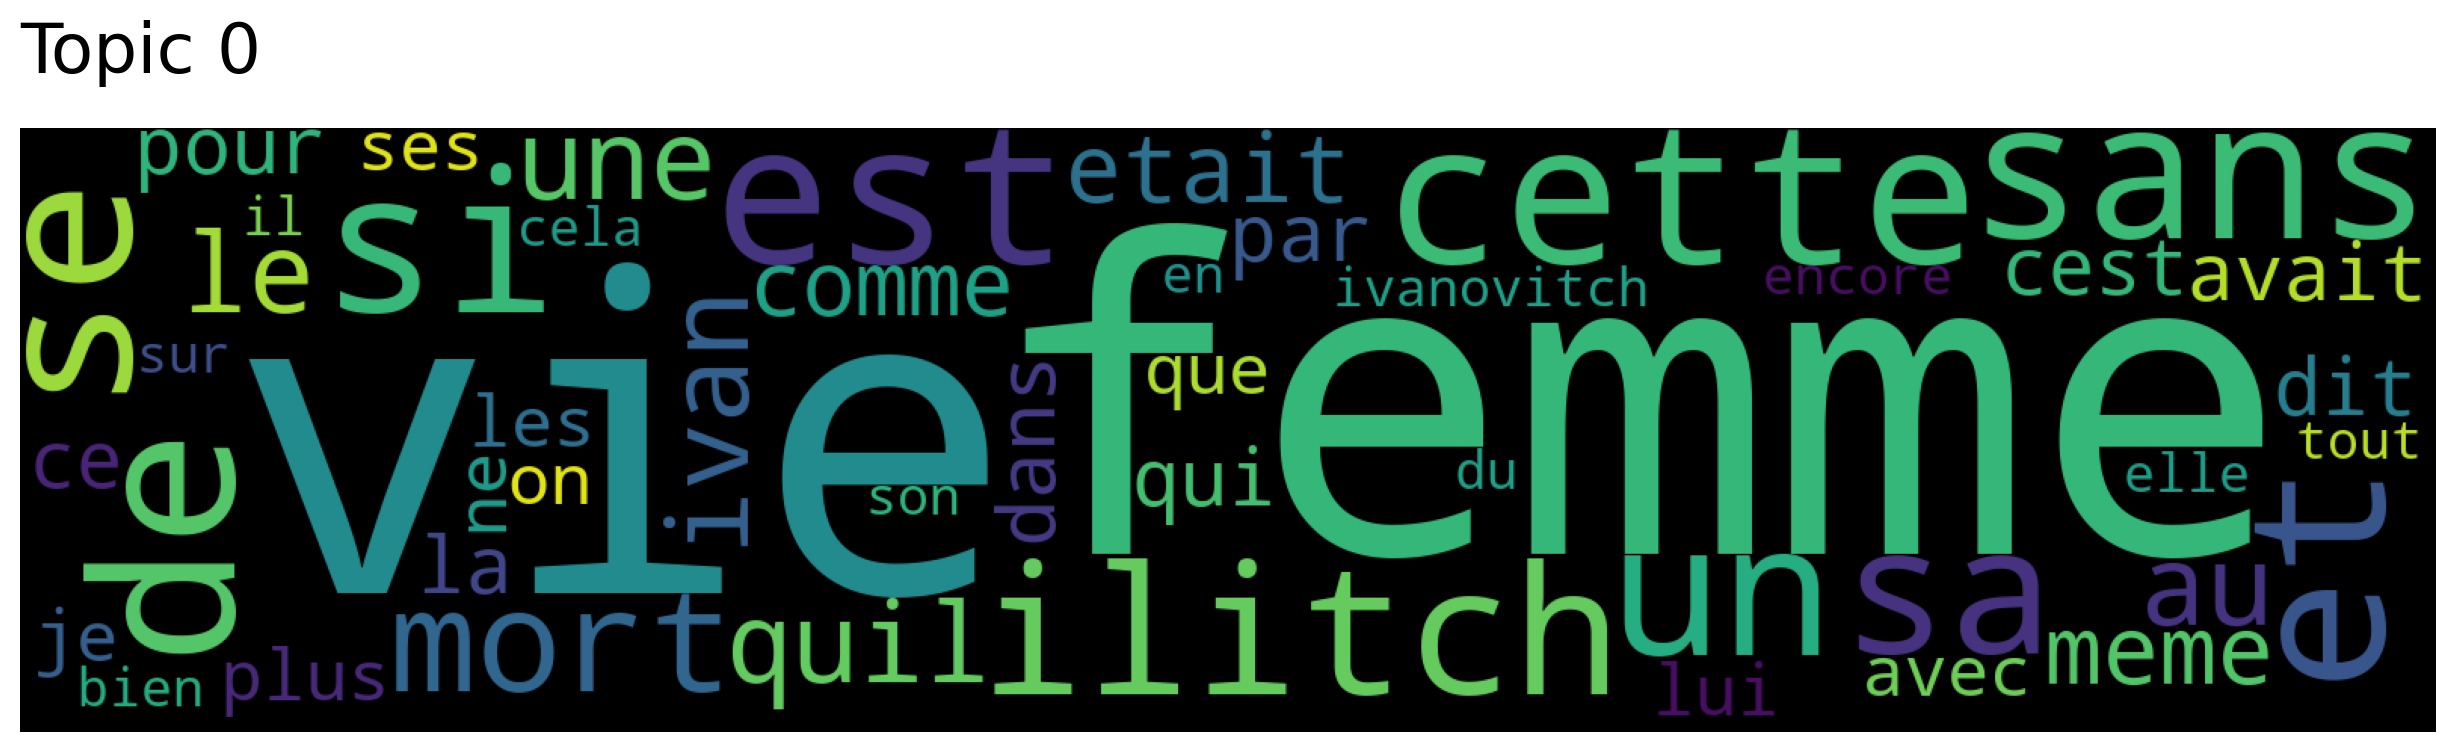

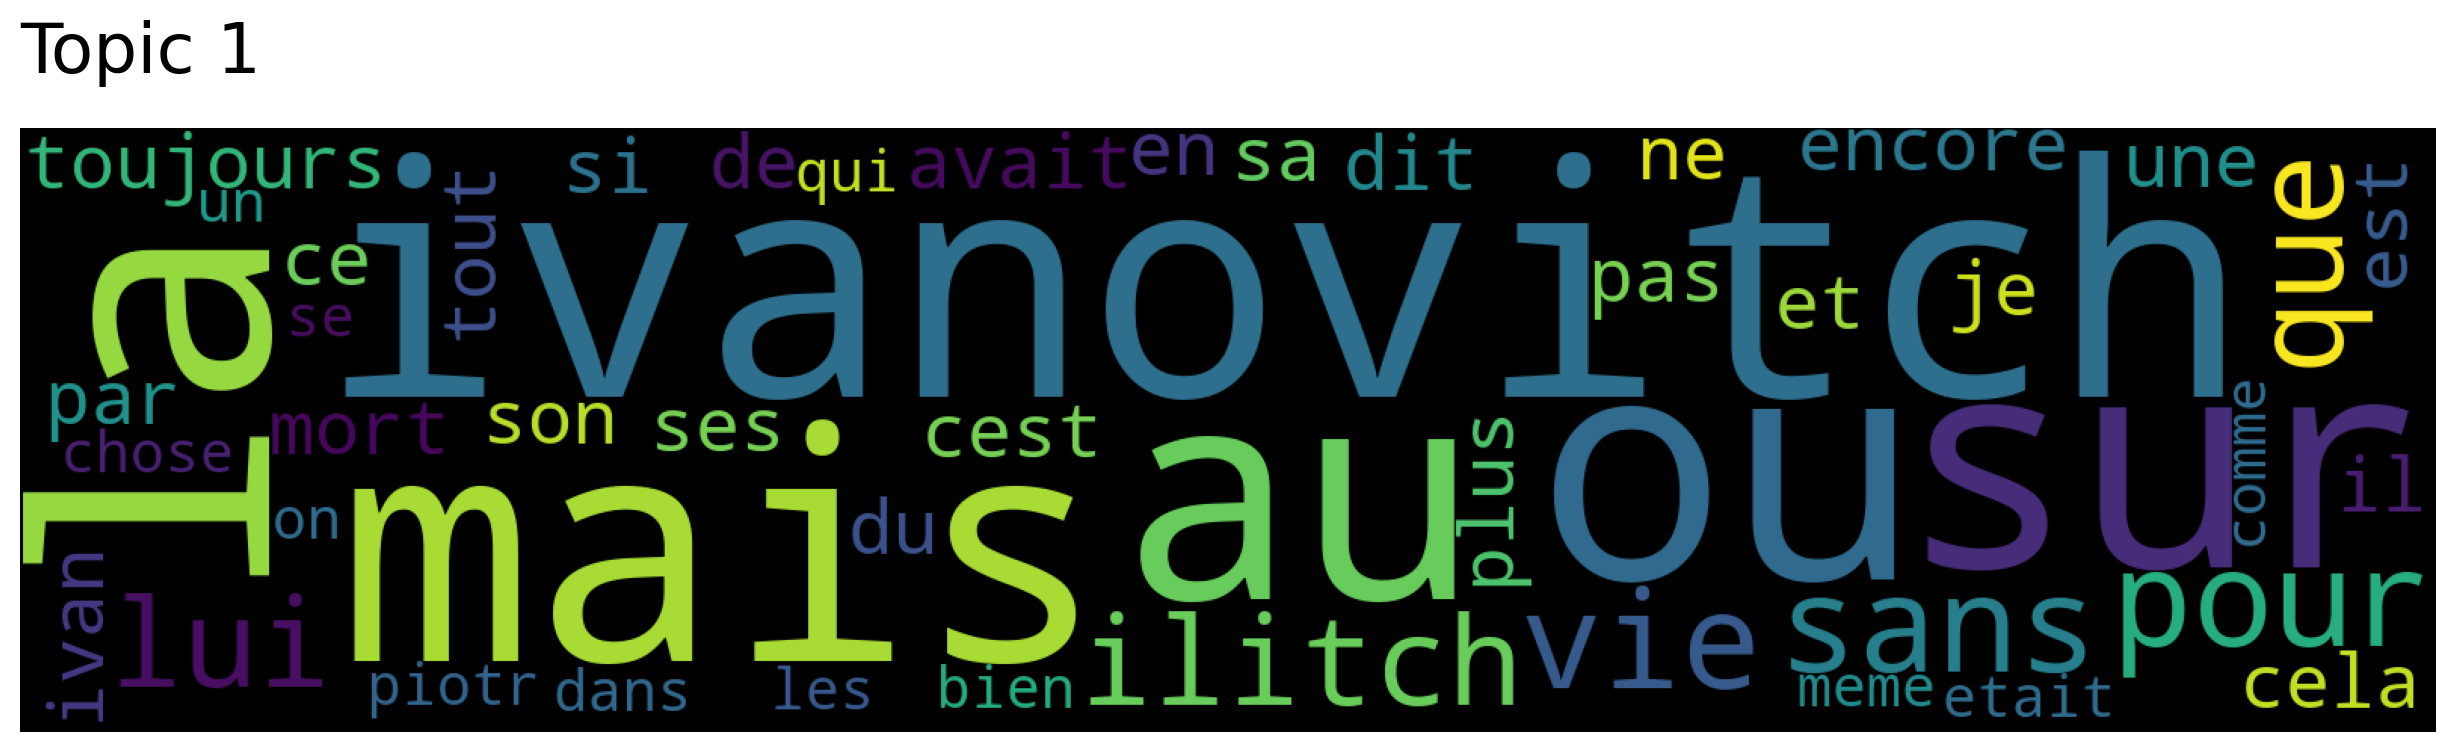

In [199]:
topic_sizes, topic_nums = model.get_topic_sizes()
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)